### Import Python packages and read csv in to Pandas dataframe

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns




df = pd.read_csv('../original_data/okcupid/okcupid_profiles.csv')
#df = pd.read_csv('../original_data/okcupid/okcupid_profiles.csv', index_col = False)

# Do not do this one (index_col =0). It removes age, etc.
# I don't remember the details. Just don't use it in this context
#df = pd.read_csv('../original_data/okcupid/okcupid_profiles.csv', index_col = 0)

### On the index


###### Initially (days ago):
I don't think I need to reset the index because there is not an index column in the csv, so pd will add one upon reading.

###### 10/1/21 2:45pm ish
I left off messing around with index of the df. I noticed the df doesn't have an "id" column, which might be nice for groupby so i was trying to make one

I think the index exists regardless of whether there is a literal column in the dataframe for the index?

https://pandas.pydata.org/pandas-docs/dev/reference/indexing.html

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

https://towardsdatascience.com/pandas-index-explained-b131beaf6f7b

While reading the towardsdatacience article, I noticed they were getting these pretty table output when they called dataframe.head() in their notebook. So now I'm learning how to get the pretty table output, and I think it might have something to do with IPython. So I'm gonna work on understanding IPython now. And figuring out how I can get the nice pretty table display. 

https://ipython.readthedocs.io/en/stable/interactive/tutorial.html

This was suggested by Codecademy for "pretty display.....#Displays all variables and statements on its own line" and I have no idea how it is helping me. 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
https://www.codecademy.com/paths/data-analyst/tracks/dacp-python-fundamentals/modules/dscp-getting-started-off-platform/articles/getting-more-out-of-jupyter-notebook

###### 10/1/21 4:06pm 
I give up on this effort to get the pretty df.head() table display. I think it might have something to do wtih widgets. Every article I find when I search terms related to "pretty table display jupyter notebook" seem to be not related. Like they already have the pretty tables and are talking about resizing them or something. 
It might also have something to do with display

https://ipywidgets.readthedocs.io/en/latest/

https://stackoverflow.com/questions/26873127/show-dataframe-as-table-in-ipython-notebook

https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/

Anyway, I wanted an id column whose values are 0 - # of dataframe rows - 1 and increments by 1. I thought maybe looking up index might help me get it. 

But now I'm just going to make an id column as follows:

In [ ]:
id_column = pd.Series([x for x in range (0, len(df['age']), 1)])
#i could use a lamda function or i could do list comprehension 

print(id_column.min())
print(id_column.max())

df['id'] = id_column
#print(df.info())

In [ ]:
# Also, on my journey, I did learn this command
print("Shape of data{}".format(df.shape))

### General dataframe info

In [ ]:
print(df.info())
print(len(df.drugs))
#print(df.columns)
#print(df.dtypes)

In [ ]:
print(df.head()) 
# I put this in a separate cell because sometimes I like to run commands without this one. 

### Checking what the possible values of sex variable are

In [ ]:
print(df.sex.unique())

### Check for duplicates

In [ ]:
duplicates = df.duplicated()
print(duplicates.value_counts())

There are no duplicates.

### Check for missing

In [ ]:
# I can see from df.info() that some variables but missing values, but I prefer to also use these commands to check
# This tells us if there are null values somewhere in the df
print(df.isnull().values.any())

# This prints out the sum of null values by column 
print(df.isnull().sum())

There are misssing values in some columns, and I will address it later/as it comes up for analyses.

### Messing around

In [8]:
print(df['age'].nunique())
print(df['age'].dtypes)
print(df['age'].min())
print(df['age'].max())
# the max age is 110... someone was probably messing around 

54
int64
18
110


I had a hunch that these two would produce essentially the same output (a one way frequency table)

```
print(pd.crosstab(index=df['age'], columns='count'))
print(df.groupby('age').id.count().reset_index().rename(columns={"id": "counts"}))
```

In [9]:
print(pd.crosstab(index=df['age'], columns='count'))

col_0  count
age         
18       309
19       611
20       953
21      1282
22      1934
23      2592
24      3242
25      3531
26      3724
27      3685
28      3583
29      3295
30      3149
31      2735
32      2587
33      2206
34      1902
35      1755
36      1583
37      1427
38      1330
39      1172
40      1030
41       980
42      1072
43       858
44       708
45       643
46       578
47       529
48       481
49       459
50       437
51       350
52       344
53       252
54       267
55       265
56       271
57       256
58       197
59       221
60       195
61       176
62       167
63       138
64       113
65       109
66       105
67        66
68        59
69        31
109        1
110        1


In [ ]:
print(df.groupby('age').id.count().reset_index().rename(columns={"id": "counts"}))

I want to make a histogram with age. <br>
The first thing I want to do is check to see if the values for age go from 18 - 110 continuously, or if there is a integer in there that is missing<br>
I don't know if this part is necessary, but I want to do it anyways. 

In [ ]:
#print(df['age'].unique())

# Starting dataframe
age_freq = df.groupby('age').id.count().reset_index().rename(columns={"id": "counts"})
print(type(age_freq))
print(age_freq.columns)

# Pull the list of ages only 
ages_uniqarray = age_freq['age']
print(type(ages_uniqarray))
# Change the type to a numpy array
# because I want to do the comparisons with numpy
ages_uniqarray = np.array(ages_uniqarray)
print(type(ages_uniqarray))

# Creating the comparison array
compare_array = np.array([x for x in range(18, 111, 1)])
print(compare_array.min())
print(compare_array.max())


# Check to see if ages contained in ages_uniqarray 
# are identical to the ages in compare_array
# ages_uniqarray compare_array

# numpy.array_equal 
# will return True if two arrays have the same shape and elements, 
# False otherwise

# first just curious to learn more about the two arrays
print("ages_uniqarray")
print(ages_uniqarray.ndim)
print(ages_uniqarray.size)
print(ages_uniqarray.shape)

print("compare_array")
print(compare_array.ndim)
print(compare_array.size)
print(compare_array.shape)

# ndarray.ndim will tell you the number of axes, or dimensions, of the array.

# ndarray.size will tell you the total number of elements of the array. 
# This is the product of the elements of the array’s shape.

# ndarray.shape will display a tuple of integers that indicate the number of elements stored 
# along each dimension of the array. 
# If, for example, you have a 2-D array with 2 rows and 3 columns, the shape of your array is (2, 3).

print(110 - 17)

np.array_equal(ages_uniqarray, compare_array)

Actually using .ndim, .size, .shape, before even doing numpy.array_equal, tells me that it does not appear that there is an age for every int between 18 - 110 inclusive.

I don't know if this was necessary. I'm going to make hisograms for age now anyways. But I was curious. And it was a fun learning exercise.

#### Binning ages
JUST DROPPING THIS HERE FOR A LITTLE BIT<br>
This is code for binning that I can use later if I want to make bins
```
# Create bins
bins = [x for x in range(10, 90, 5)]
print(bins)
census['binned_age'] = pd.cut(census['age'], bins)
print(census['binned_age'].dtypes)
print(census[['binned_age', 'age']].head())
print(len(census['age']))
print(pd.crosstab(index=census['binned_age'], columns='count'))
print(census.head())
```


#### Histogram for age

<class 'numpy.ndarray'>
18
110
(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,  309,  611,  953, 1282,
       1934, 2592, 3242, 3531, 3724, 3685, 3583, 3295, 3149, 2735, 2587,
       2206, 1902, 1755, 1583, 1427, 1330, 1172, 1030,  980, 1072,  858,
        708,  643,  578,  529,  481,  459,  437,  350,  344,  252,  267,
        265,  271,  256,  197,  221,  195,  176,  167,  138,  113,  109,
        105,   66,   59,   31,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          1], dtype=int64), array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31

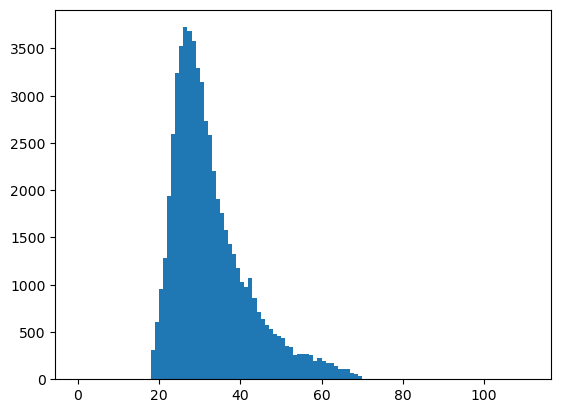

In [20]:
age_array = df['age'].values
print(type(age_array))

print(age_array.min())
print(age_array.max())


age_hist1 = np.histogram(age_array, range=(0, 111), bins=111)
print(age_hist1)

ages_hist2 = plt.hist(age_array, range=(0, 111), bins=111)
plt.show()

I know that even though it's silly and they are outliers, there is one person for whom age = 109 and one person for whom age = 110.

I've tried several values for range and bins.

I'm confused as to why 109 and 110 are not showing up on any variations of histogram.

### Income 

In [ ]:
# Explore the income variable here
print(df.income.isnull().sum())
# While this tells us there are no missing in income, -1 indicates the person chose not to provide income

print(df.income.nunique())
print(df.income.unique())
# 0ne-way freq table of income
print(pd.crosstab(index=df.income, columns='count'))

# Percent -1 AKA missing
print((48442/59946)*100)

# Count of rows where income != -1
print(59946 - 48442)

While print(df.income.isnull().sum()) tells us there are no missing income values, -1 indicates the person chose not to provide an income value ([via okcupid_codebook_revised.txt](https://github.com/rudeboybert/JSE_OkCupid/blob/master/okcupid_codebook_revised.txt)).
We can consider -1 values as missing values. 
From the one-way frequency table of income, we can see that 80% of respondents did not provide an income value. So the income variable is missing ~80% of responses. This makes the income variable less useful. 

There are situations where I could justify replacing missing numerical data with an average or some other value, but replacing 80% of income data with fill-ins for missing values will affect the integrity of the data. I don't think anything usefull would be gained from such an endeavor.

I can do income-related analyses with the ~20% of respondents who did provide an income value, but I cannot use these analyses to make statements about the entire 59946 respondents as a whole. I will do analyses with the ~20% of respondents who did provide an income value for the purpose of demonstrating my quantitative data analysis skills. (e.g. a histogram of income responses)

Note that the income responses are already discrete as opposed to continuous. 

For the record, as an OKCupid user (in 2014 but not in 2015), I have no recollection of OKCupid ever asking for income data, but perhaps I just forgot or overlooked that question.

Count of rows where income != -1 is 11504

#### Create a new dataframe that has only the rows where income != -1

In [ ]:
# Create a new dataframe that has only the rows where income != -1
df_hasincome = df[df.income != -1]
print(df_hasincome.info())
print(len(df_hasincome.age))
print(df_hasincome.columns)
print(df_hasincome.dtypes)

In [ ]:
# This tells us there are null values somewhere in the df
print("(df_hasincome.isnull().values.any())")
print(df_hasincome.isnull().values.any())

# This prints out the sum of null values by column 
print("(df_hasincome.isnull().sum())")
print(df_hasincome.isnull().sum())

Fun thing: Noticed the 3 people for whom a response to height was missing were not included in this data set <br>

In [ ]:
print(df_hasincome.income.nunique())
print(df_hasincome.income.unique())
# 0ne-way freq table of income
print(pd.crosstab(index=df_hasincome.income, columns='count'))

I wonder if the income distribution of respondents is patterned similarly to that of the San Francisco income distribution at the time of collection. I'm putting this here because it is a thought I had at this point in the analysis, and it's my analysis. I would need to confirm the year of the data collection. I think Kaggle said 2015, but the data owner GitHub said "2010s". I will have to search data owner GitHub for a year later. 

Maybe it is because it is late and I am tired, but now I'm wondering if since the income data is already binned, is it considered categorical? Would a hisogram be appropriate? This is definitely me being tired and a sign that it is time for bed. 

### Notes to self for later

Best rounding practices? <br>

### Possible things I can do with data:

make sure you're using the words "value" and "variable" right <br>

deal with missing values <br>

1. split the sex column into two columns: male and female OR I change the sex column to be male = 1 femaile = 0
2. maybe take advantage of age being a number to do some quantitative analyses 
3. make demographics tables (including treating age as a categorical variable)
4. I can potentially do quantitative analyses with income 
5. This is your reminder to ADD HYPERLINKS TO read_me.md LATER <br>
to be continued